In [23]:
import cv2
import numpy as np
from numpy import shape
import matplotlib.pyplot as plt 
from skimage.feature import graycomatrix, graycoprops
from image_extractor import init_lut, statistic_analysis, linear_fn, curved, seperate_chanel, preprocess_hsv, histogram_analysis

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (35).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Brown/image (1).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (2).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (67).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'


plt.rcParams['figure.dpi'] = 102

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

((276.326171875, 264.5602722167969), (96.36743927001953, 325.3461608886719), 170.8767547607422)


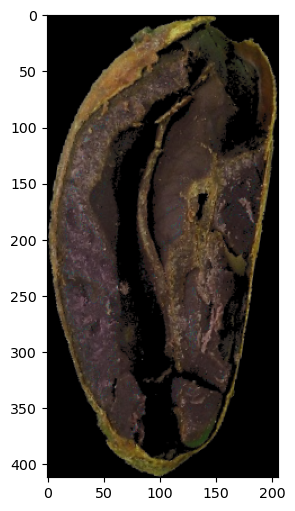

In [28]:
plt.rcParams["figure.figsize"] = (6,6)
image_hsv, cnt, ellipse = preprocess_hsv(image, Contour=True)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(ellipse)
(cX, cY),(aX, aY), o = ellipse

plt.imshow(image_rgb)
plt.show()

In [25]:
hei, wid, c = shape(image_rgb)

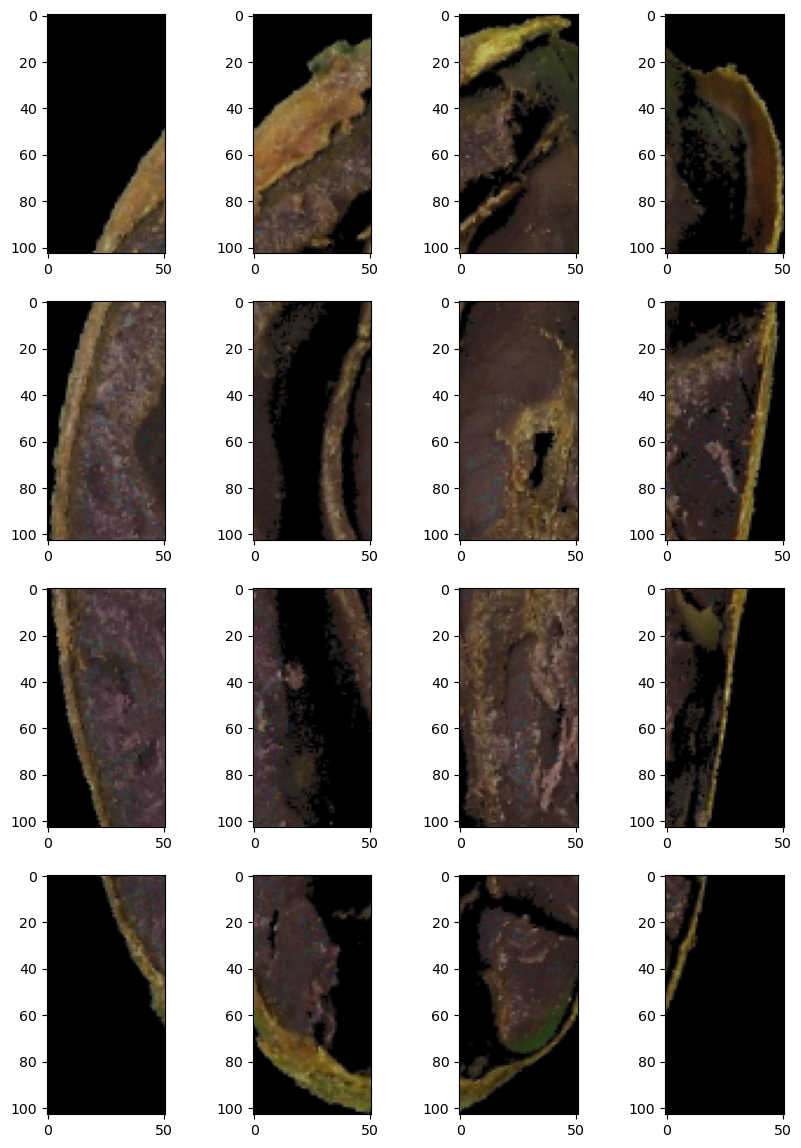

In [33]:
plt.rcParams["figure.figsize"] = (10,18)
h,w = int(hei/4), int(wid/4)
n = 0
for i in range(0, 4):
    for j in range(0, 4):
        n = n+1
        im = image_rgb[i*h:i*h+int(hei/4), j*w:j*w+int(wid/4),:]
        # im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        # level = 16
        # bins = np.linspace(0, 256, level+1)
        # im = np.digitize(im, bins) - 1
        # glcm = graycomatrix(im, [7], [0], level, True, False)
        # glcm = glcm[2:level+1,2:level+1]
        plt.subplot(5,4,n)
        # plt.imshow(glcm[:,:,0,0])
        plt.imshow(im)
        # print(i, j)
plt.show()